In [ ]:
# 1st 

### Import the Packages

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests 
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import folium
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

### Get the data

In [2]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df=pd.read_html(url)[0]
df=df.loc[df['Borough'] != 'Not assigned',:]
url2='http://cocl.us/Geospatial_data'
geo_info=pd.read_csv(url2)
df_withgeo=pd.merge(df,geo_info,left_on='Postal Code',right_on='Postal Code',how='outer')

### Extract the data of Toronto

In [3]:
df_Toronto=df_withgeo.loc[df_withgeo['Borough'].str.find('Toronto')>=0]

### Define:
* The Foursquare Credentials and Version
* To get the top 100 venus with 500 meter of the neighborhood

In [7]:
CLIENT_ID = '0QHM0LDENEU5RMPVXRQTCV4OABG0N5F3XBODATNQIN4SGAM2'
CLIENT_SECRET = 'SAA3XJOEAGHN2J04ZRM5CZL1TAHDVZHG1PI0M2ELQCPX5E1W'
VERSION = '20180605'
radius = 500
LIMIT = 100

###  Get the venus around the neighborhood in Toronto

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'] 
    return(nearby_venues)

In [10]:
Toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [13]:
Toronto_venues.to_csv('Toronto_venues.csv')

In [39]:
print('There are {} neighborhoods.'.format(len(Toronto_venues['Neighborhood'].unique())))

There are 39 neighborhoods.


In [19]:
mean_venus=Toronto_venues.groupby(by='Neighborhood')['Venue'].count().mean()
mean_venus_category=Toronto_venues.groupby(by='Neighborhood')['Venue Category'].nunique().mean()

In [22]:
print('On average, each neighborhood has {} venuse'.format(np.round(mean_venus,0)))

On average, each neighborhood has 41.0 venuse


In [33]:
Toronto_top10=Toronto_venues.groupby(by='Neighborhood')['Venue'].count().sort_values(ascending=False).head(10)

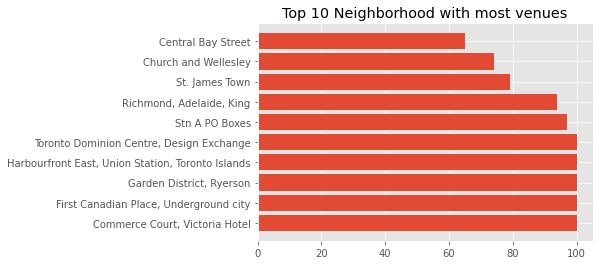

In [38]:
plt.style.use('ggplot')
plt.barh(Toronto_top10.index,Toronto_top10.values)
plt.title("Top 10 Neighborhood with most venues")
plt.show()

### Here is Mary's scorecard:
|Venue Category|Scores|
|-|-|
|Shopping Mall|15|
|Park|13|
|Coffee|10|
|Yoga|7|
|Gym|7|
|Italian Restaurant|5|
|American Restaurant|5|
|Japanese Restaurant|5|
|Movie|5|
|Theater|5|
|Museum|5|


### In the Week 5's Assignment, we will combine the data and scorecard together to rank the neighborhood to help Mary make decision.